In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

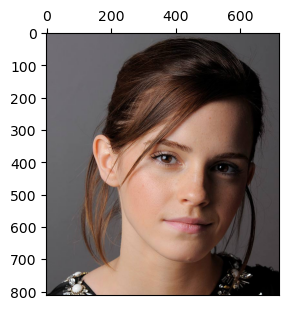

In [2]:
im = cv.imread("a1images/emma.jpg")

fig, ax = plt.subplots(1,1,figsize = (3,4))
ax.imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax.xaxis.set_ticks_position('top')
plt.show()


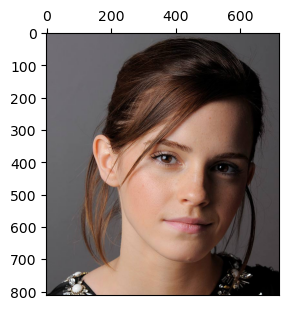

In [3]:
im = plt.imread("a1images/emma.jpg")
fig ,ax = plt.subplots(1,1, figsize = (3,4))

ax.imshow(im)
ax.xaxis.set_ticks_position('top')
plt.show()

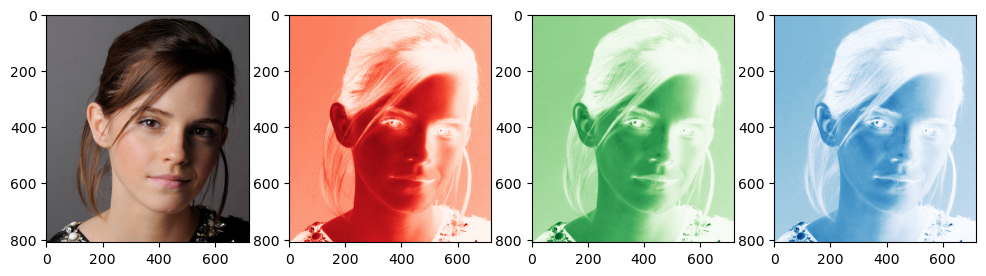

In [4]:
im = plt.imread("a1images/emma.jpg")
fig ,ax = plt.subplots(1,4, figsize = (12,16))

ax[0].imshow(im) 
ax[1].imshow(im[...,0],cmap='Reds')    #red plane only
ax[2].imshow(im[...,1],cmap='Greens')  #green plane only
ax[3].imshow(im[...,2],cmap='Blues')   #blue plane only

#ax.xaxis.set_ticks_position('top')
plt.show()

In [5]:
im.shape

(810, 720, 3)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19784\1100180772.py:7: RuntimeWarning: overflow encountered in scalar add
  val = sum(im[i][j])/3


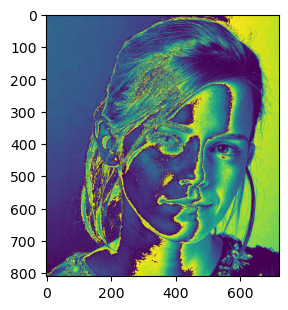

In [6]:
rows , cls , chas = im.shape   #(810, 720, 3)

gray_im = np.zeros((rows,cls))

for i in range(rows):
    for j in range(cls):
        val = sum(im[i][j])/3
        gray_im[i][j] = val

fig ,ax = plt.subplots(1,1, figsize = (3,4))

ax.imshow(gray_im)
plt.show()

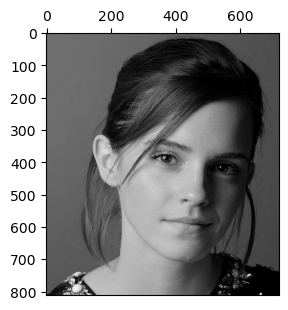

In [7]:
gray_im = np.dot(im,[0.2989, 0.5870, 0.1140])

fig ,ax = plt.subplots(1,1, figsize = (3,4))
ax.imshow(gray_im,cmap = 'gray')
ax.xaxis.set_ticks_position('top')
plt.show()

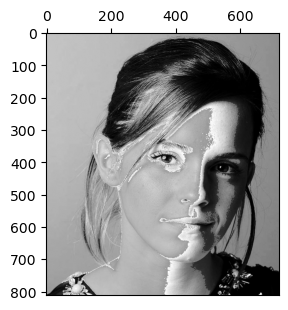

In [8]:
def f(x):
    return np.where(
        (x >= 50) & (x < 150),
        1.55 * x + 22.5,
        x
    ).astype(np.uint8)


    
new_im_1 = f(gray_im)

fig ,ax = plt.subplots(1,1, figsize = (3,4))

ax.imshow(new_im_1,cmap = 'gray')
ax.xaxis.set_ticks_position('top')
plt.show()

In [9]:
im = cv.imread('a1images/emma.jpg')
gray_im = cv.cvtColor(im,cv.COLOR_BGR2GRAY)

"""
cv.imshow(" " , gray_im)
cv.waitKey(0)
cv.destroyAllWindows()
"""


'\ncv.imshow(" " , gray_im)\ncv.waitKey(0)\ncv.destroyAllWindows()\n'

In [13]:
#with mask and lut

r = np.arange(256)
s = np.zeros(256)

#function
slope = (255-100)/(150-50)
c = 100 - slope * 50

mask = (r>=50) & (r<150)
s[mask] = slope * r[mask] + c


m1 = r<50
s[m1] = r[m1]

m2 = r>=150
s[m2] = r[m2]

lut = np.clip(np.round(s),0,255).astype(np.uint8)

transformed = cv.LUT(gray_im,lut)


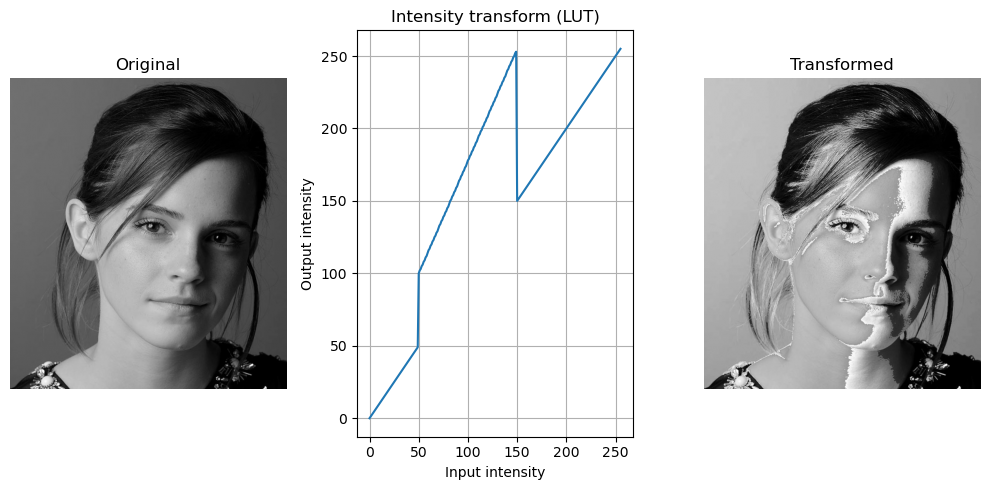

In [14]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(gray_im, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.plot(lut)
plt.title('Intensity transform (LUT)')
plt.xlabel('Input intensity')
plt.ylabel('Output intensity')
plt.grid(True)

plt.subplot(1,3,3)
plt.imshow(transformed, cmap='gray')
plt.title('Transformed')
plt.axis('off')

plt.tight_layout()
plt.show()

